In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

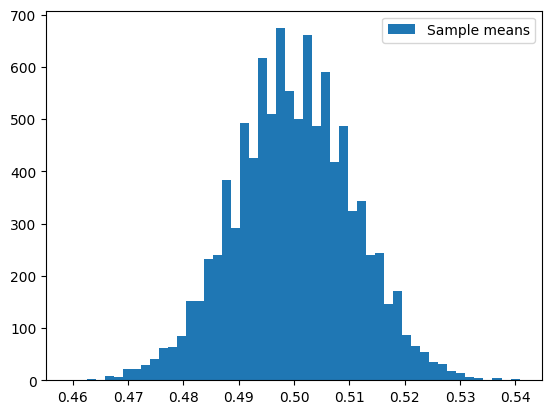

In [2]:
p=0.61
q = 1-p
n=2123

sample_means = []
for _ in range(10000):
    sample = np.random.binomial(n=1, p=0.5, size=n)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

plt.hist(sample_means, bins=50, label="Sample means")
plt.legend()
plt.show()

# Almost all sample lie between 0.46 and 0.54, so we can predict the winner of the election since value 61% would be extremely unusual

0.07021337946817664
0.5918367346938775


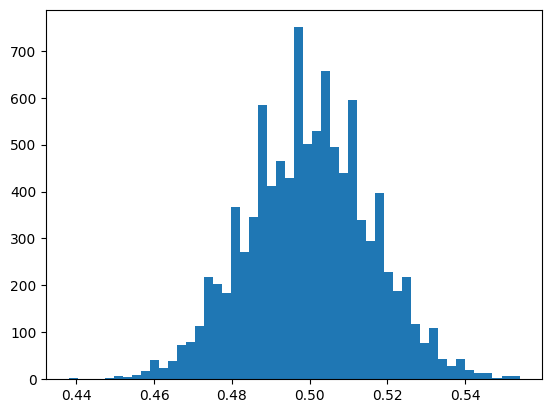

In [3]:
sample_size=49
prefers_coke=29/sample_size

sample_mean = prefers_coke
sample_std = np.sqrt((prefers_coke*(1-prefers_coke)) / sample_size)
print(sample_std)
print(prefers_coke)

sample_means = []
for _ in range(10000):
    sample = np.random.binomial(n=1, p=0.5, size=1000)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

plt.hist(sample_means, bins=50)
plt.show()

In [4]:
np.array(sample_means).mean() + 3 * sample_std # It is not a strong evidence that majority prefers Code

0.7106084384045299

In [15]:
x = np.arange(0, 60.01, 0.01)
y1 = stats.gamma.pdf(x, a=16, scale=1.25)
y2 = stats.gamma.pdf(x, a=9, scale=8/3)
data = stats.gamma.rvs(a=16, scale=1.25, size=25 * 100000)
data = np.reshape(data, newshape=(100000, 25))
data.shape, data[:2]

((100000, 25),
 array([[23.10427057, 13.86543928, 21.95217219, 27.92022457, 16.40563643,
         13.73755001, 16.33068776, 21.47387503, 15.15086598, 19.81261169,
         16.90504971, 17.37815614, 23.11791711, 24.51663096, 17.50245338,
         19.06300704, 15.11003107, 23.39373705, 22.20000866, 15.1368487 ,
         22.06721707, 27.37094257, 14.05963602, 13.40832501, 19.96550773],
        [29.16274076,  8.0168245 , 23.40480365, 10.34665441, 13.64574265,
         24.75565391, 26.48976224, 16.24996259, 19.15792074, 22.61410621,
         12.6162615 , 29.94268038, 18.76652067, 19.39738193, 21.53214047,
         23.57508393, 17.09090311, 20.56469627, 26.4776676 , 13.34134332,
         21.29219974, 25.86581468, 21.3067571 , 14.35981674, 21.00893284]]))

In [18]:
# Now let's create a vector Ymeans that will contain means from each row
Ymeans = []
for i in range(len(data)):
    Ymeans.append(np.mean(data[i]))
Ymeans = np.array(Ymeans)
print(len(Ymeans)), Ymeans[:10]

100000


(None,
 array([19.23795207, 20.03929488, 21.05622996, 20.56484509, 19.15368497,
        19.85658418, 20.28244879, 19.40075651, 20.68362923, 19.2070146 ]))

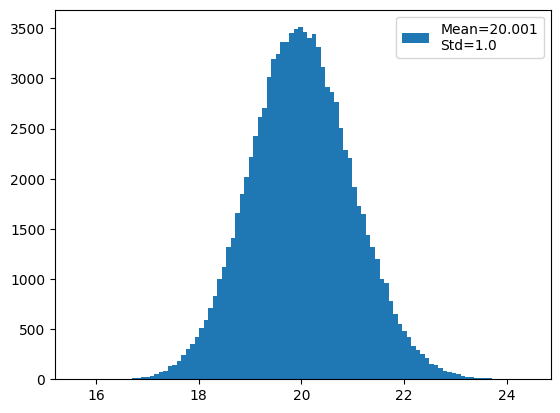

In [23]:
mean = round(Ymeans.mean(),3)
std = round(Ymeans.std(),3)
plt.hist(Ymeans, bins=100, label=f"Mean={mean}\nStd={std}")
plt.legend()
plt.show()

In [29]:
# Now we will show that actual probability that values fall between 15 and 25 is 0.688
proba = stats.gamma.cdf(x=25, a=16, scale=1.25) - stats.gamma.cdf(x=15, a=16, scale=1.25)
print(f"Probability = {round(proba*100,3)}%")

Probability = 68.79%


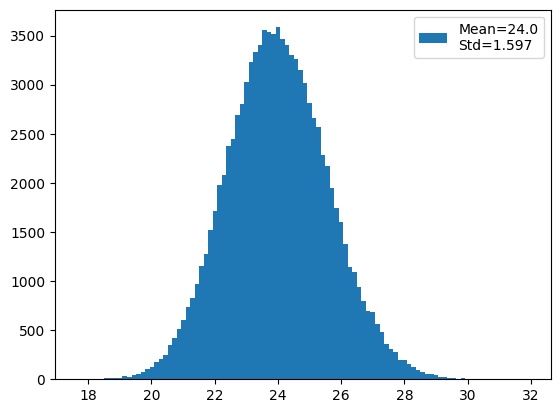

In [26]:
# Generate random numbers from gamma distribution
data2 = stats.gamma.rvs(a=9, scale=8/3, size=25 * 100000)
data2 = np.reshape(data2, newshape=(100000, 25))

Ymeans2 = []
for i in range(len(data2)):
    Ymeans2.append(np.mean(data2[i]))
Ymeans2 = np.array(Ymeans2)

mean2 = round(Ymeans2.mean(),3)
std2 = round(Ymeans2.std(),3)
plt.hist(Ymeans2, bins=100, label=f"Mean={mean2}\nStd={std2}")
plt.legend()
plt.show()

In [34]:
p=0.5
n1 = 100
coin_flipped_100_times = stats.binom.cdf(k=60, n=n1, p=p) - stats.binom.cdf(k=40, n=n1, p=p)
n2 = 1000
coin_flipped_1000_times = stats.binom.cdf(k=510, n=n2, p=p) - stats.binom.cdf(k=490, n=n2, p=p)

coin_flipped_100_times, coin_flipped_1000_times

(0.9647997997822952, 0.49333995737554653)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
[1.0, 1.5, 2.0, 2.5, 3.0]


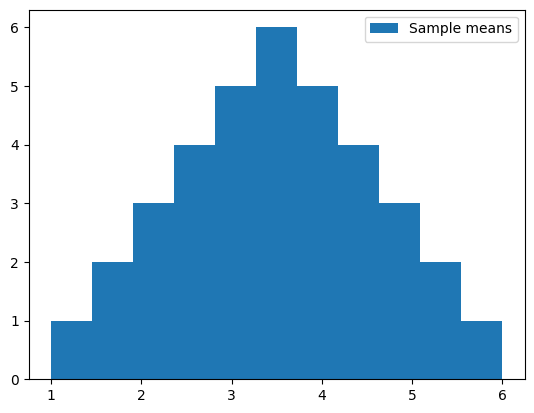

In [48]:
pairs = []
for i in range(1, 7):
    for j in range(1, 7):
        pairs.append((i, j))
print(pairs), len(pairs)

means = []
for pair in pairs:
    means.append((pair[0] + pair[1]) / 2)

print(means[:5])

plt.hist(means, bins=11, label="Sample means")
plt.legend()
plt.xticks([1,2,3,4,5,6])
plt.show()

In [81]:
# We have more probability near the middle since values like 3, 3.5, 4 have greater probaility than means like 1 or 6 since
# only (1+1)/2 = 1 and (6+6)/2 = 6 but (1+6)/2 = 3.5 (2+5)/2 = 4.5 and more
# With additional rools we would have approx. normal shape with mean around 3.5

n_simulations = 1_000_000
n_samples = 10
random_indices = np.random.randint(0, 36, size=(n_simulations, n_samples))
pairs = np.array(pairs)
selected_pairs = pairs[random_indices]  
pair_means = selected_pairs.mean(axis=2)
final_means = pair_means.mean(axis=1)

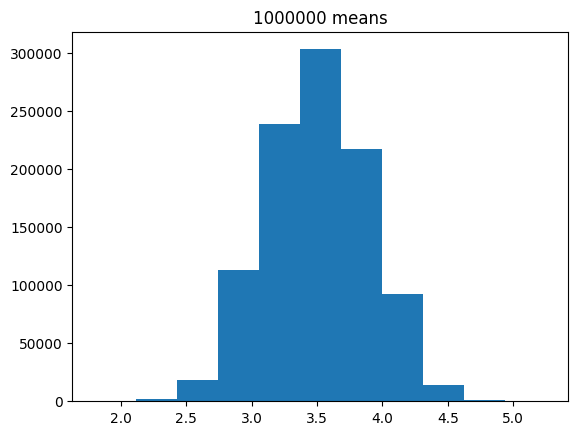

In [83]:
plt.hist(final_means, bins=11)
plt.title("1000000 means")
plt.show()

In [86]:
ns = [10, 1000, 100000, 10000000]
mean=5
for n in ns:
    data = stats.poisson.rvs(mu=mean, size=n)
    sample_mean = data.mean()
    print(f"Mean for size {n} = {sample_mean}") # Theoretical mean of poisson distribuiton is in this case 5

Mean for size 10 = 5.3
Mean for size 1000 = 4.979
Mean for size 100000 = 4.99253
Mean for size 10000000 = 5.0002296


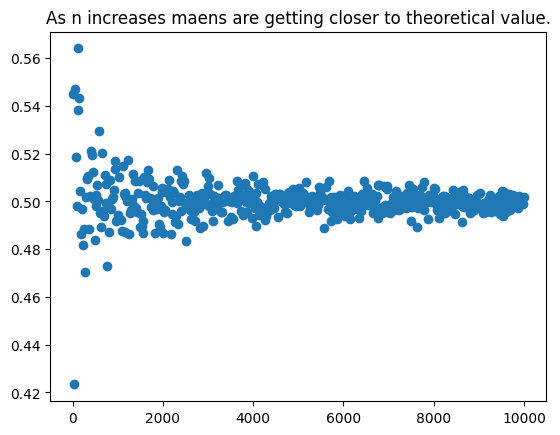

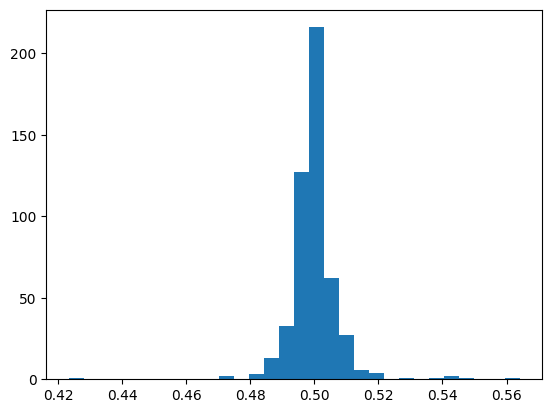

In [112]:
ns = np.linspace(10, 10000, 500, dtype=int)
means = np.zeros((len(ns)))
for i, n in enumerate(ns):
    uniform_sample = stats.uniform.rvs(size=n)
    sample_mean = uniform_sample.mean()
    means[i] = sample_mean

plt.scatter(ns, means)
plt.title("As n increases maens are getting closer to theoretical value.")
plt.show()

plt.hist(means, bins=30)
plt.show()

In [117]:
mean = 5.5
std = 3.9
# It will be closer to exponential skewed to the right

n = 1000
sample_mean = mean
sample_std = std / np.sqrt(n)
SE = sample_std
print(sample_mean, round(SE, 3))

confidence_interval = (mean - 3 * SE,
                       mean + 3*SE)
print(confidence_interval) # 99% probability 

5.5 0.123
(5.1300135137603, 5.8699864862397)


In [121]:
female_percentage = 0.6
n = 50
sample_females = 18
sample_males = 32
# Y -> gender random variable
# 0 -> male 1 -> female P(0) = 0.4 P(1) = 0.6
# For gender in this sample males(y=0) = 0.64, for females(y=1) = 0.36
p = female_percentage
SE = np.sqrt(p*(1-p)/n)
print(p, SE)

confidence_interval = (p - 3 * SE, p + 3 * SE)
print(confidence_interval) # Proportions of females in the sample is 0.36, so it would be very unusual

0.6 0.06928203230275509
(0.3921539030917347, 0.8078460969082653)


In [123]:
n = 1_000_000
means = [9, 100, 100000]
for mean in means:
    poisson_variables = stats.poisson.rvs(mu=mean, size=n)
    mean1 = poisson_variables.mean()
    var1 = poisson_variables.var()
    mean2 = (np.sqrt(poisson_variables)).mean()
    var2 = (np.sqrt(poisson_variables)).var()
    print(f"Mean1 = {mean1}, Var1 = {var1}")
    print(f"Mean2 = {mean2}, Var2 = {var2}\n")

# By the delta method -> variance is approximately 1/4 when mean is large

Mean1 = 8.997507, Var1 = 9.010304784951
Mean2 = 2.955368193907571, Var2 = 0.26330583843950106

Mean1 = 100.003971, Var1 = 99.94052123115905
Mean2 = 9.987650763170103, Var2 = 0.25080323294760315

Mean1 = 99999.8521, Var1 = 99950.94423959
Mean2 = 316.22713707333384, Var2 = 0.249878402899833



2.9467269558218927
0.09900091145490647
0.31464410284463695


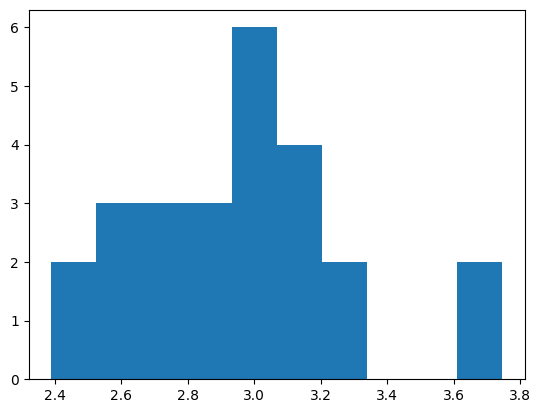

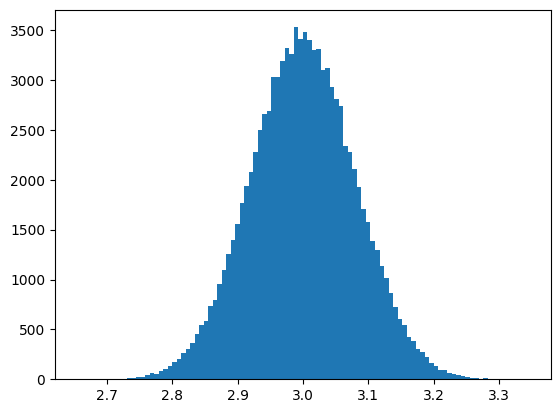

In [134]:
mean=3.0
std=0.40
n = 25
sample = stats.norm.rvs(loc=mean, scale=std, size=n)
print(sample.mean())
print(sample.var())
print(sample.std())

# Sample data distribution
plt.hist(sample, bins=10)
plt.show()

# Sampling distribution of Y-hat
sample2 = stats.norm.rvs(loc=mean, scale=std/np.sqrt(n), size=100_000)
plt.hist(sample2, bins=100)
plt.show()